In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

<center><H1>KMeans Clustering</H1></center>

<p align="center">
  <img width="400" height="350" src="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif">
</p>


### Steps

**All the libraries you need have been imported for you**

**Work through at least 2 of preloaded datasets and:**
- [Standardize your Data](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- Create Elbow Plot to Determine Clusters
- Apply [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- Plot Results of Actual Results Compared to KMeans Cluster Labels
- Determine Accuracy Score if true labels are known

### 🧞‍♂️BONUS🧞‍♀️
- Complete all 3 preloaded datasets

#### Dog Horse KMeans Challenge

In [2]:
# Import Data
df_dh = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/dog_or_horse.csv")
df_dh.sample(3)

,height,weight,target,type
131,62.0,151.0,1.0,horse
87,45.0,103.0,0.0,dog
61,33.0,80.0,0.0,dog


In [3]:
# Scale Data
numeric = ['height','weight']

# Create scaler object
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_dh[numeric])

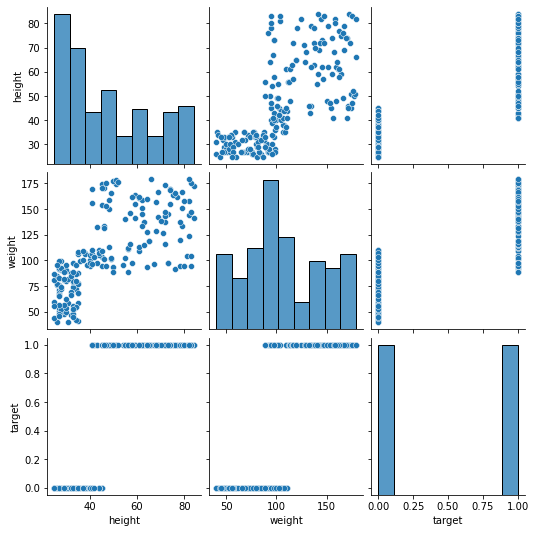

In [4]:
# Ploting all our features
sns.pairplot(df_dh)

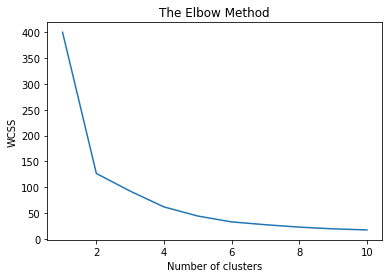

In [5]:
# Create Elbow Plot
# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

wcss = [] 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 

# Iterate over different value of K to determine optimal number of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,random_state = 42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss )
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


### This is with 4 as i can see from the elbow

In [6]:
# Apply KMeans and Plot KMeans Results and Actual Results
kmeans_type = KMeans(n_clusters = 4, random_state = 42)

y_kmeans = kmeans_type.fit_predict(df_scaled)

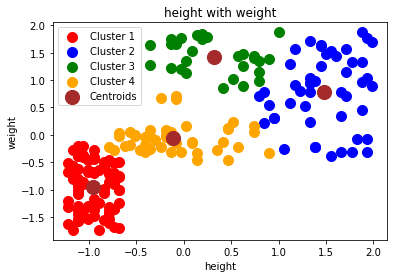

In [7]:
# Plot Clusters
plt.scatter(
    df_scaled[y_kmeans == 0, 0], 
    df_scaled[y_kmeans == 0, 1], 
    s = 100, 
    c = 'red', 
    label = 'Cluster 1'
)

plt.scatter(df_scaled[y_kmeans == 1, 0], df_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(df_scaled[y_kmeans == 2, 0], df_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(df_scaled[y_kmeans == 3, 0], df_scaled[y_kmeans == 3, 1], s = 100, c = 'orange', label = 'Cluster 4')

# Plot Centroids
plt.scatter(
    kmeans_type.cluster_centers_[:, 0],
    kmeans_type.cluster_centers_[:, 1], 
    s = 200, 
    c = 'brown', 
    label = 'Centroids')



# Title and Axes Labels
plt.title('height with weight')
plt.xlabel('height')
plt.ylabel('weight')
plt.legend()
plt.show()

In [8]:
# Compute Accuracy Score of KMean Labels with True Labels
df_dh["type"]= df_dh['type'].map({'dog': 0, 'horse': 1})
accuracy_score(df_dh["type"],y_kmeans)

0.63

### This is with 2 as i can see from pairplot

In [9]:
# Apply KMeans and Plot KMeans Results and Actual Results
kmeans_type = KMeans(n_clusters = 2, random_state = 42)

y_kmeans = kmeans_type.fit_predict(df_scaled)

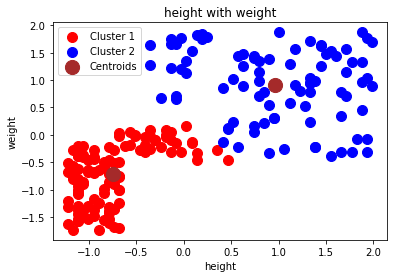

In [10]:
# Plot Clusters
plt.scatter(
    df_scaled[y_kmeans == 0, 0], 
    df_scaled[y_kmeans == 0, 1], 
    s = 100, 
    c = 'red', 
    label = 'Cluster 1'
)

plt.scatter(df_scaled[y_kmeans == 1, 0], df_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

# Plot Centroids
plt.scatter(
    kmeans_type.cluster_centers_[:, 0],
    kmeans_type.cluster_centers_[:, 1], 
    s = 200, 
    c = 'brown', 
    label = 'Centroids')



# Title and Axes Labels
plt.title('height with weight')
plt.xlabel('height')
plt.ylabel('weight')
plt.legend()
plt.show()

In [11]:
# Compute Accuracy Score of KMean Labels with True Labels
accuracy_score(df_dh["type"],y_kmeans)

0.935

#### Seattle Weather KMeans Challenge

In [12]:
df_sea = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/seattle_weather_1948-2017.csv")
df_sea.sample(3)

,ds,prcp,tmax,tmin,rain
15912,1991-07-26,0.0,76,53,False
13981,1986-04-12,0.0,54,40,False
13869,1985-12-21,0.0,40,26,False


In [13]:
#df_sea["rain"].value_counts(normalize=True)

In [14]:
# drop NA
df_sea.dropna(inplace = True)

In [15]:
# Scale Data

# Create scaler object
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_sea[['tmax','tmin']])

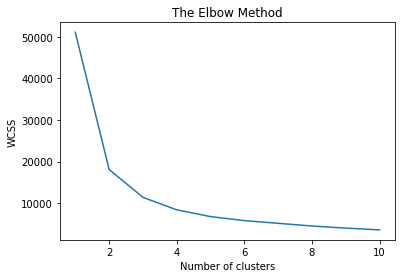

In [16]:
# Create Elbow Plot
# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

wcss = [] 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 

# Iterate over different value of K to determine optimal number of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,random_state = 42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss )
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



### This is with 4 as i can see from the elbow

In [17]:
# Apply KMeans and Plot KMeans Results and Actual Results
kmeans_rain = KMeans(n_clusters = 4, random_state = 42)

y_kmeans = kmeans_rain.fit_predict(df_scaled)

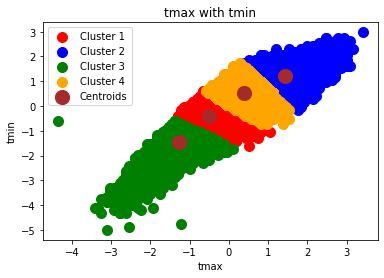

In [18]:
# Plot Clusters
plt.scatter(
    df_scaled[y_kmeans == 0, 0], 
    df_scaled[y_kmeans == 0, 1], 
    s = 100, 
    c = 'red', 
    label = 'Cluster 1'
)

plt.scatter(df_scaled[y_kmeans == 1, 0], df_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(df_scaled[y_kmeans == 2, 0], df_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(df_scaled[y_kmeans == 3, 0], df_scaled[y_kmeans == 3, 1], s = 100, c = 'orange', label = 'Cluster 4')

# Plot Centroids
plt.scatter(
    kmeans_rain.cluster_centers_[:, 0],
    kmeans_rain.cluster_centers_[:, 1], 
    s = 200, 
    c = 'brown', 
    label = 'Centroids')


# Title and Axes Labels
plt.title('tmax with tmin')
plt.xlabel('tmax')
plt.ylabel('tmin')
plt.legend()
plt.show()

In [19]:
# Compute Accuracy Score of KMean Labels with True Labels
df_sea["rain"]= df_sea['rain'].map({True: 0, False: 1})
accuracy_score(df_sea["rain"],y_kmeans)

0.3925160482229529

### Here i know it is 2 so , i'll perform it with 2

In [20]:
# Apply KMeans and Plot KMeans Results and Actual Results
kmeans_rain = KMeans(n_clusters = 2, random_state = 42)

y_kmeans = kmeans_rain.fit_predict(df_scaled)

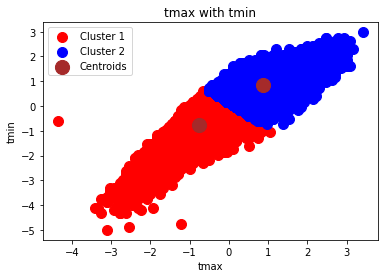

In [21]:
# Plot Clusters
plt.scatter(
    df_scaled[y_kmeans == 0, 0], 
    df_scaled[y_kmeans == 0, 1], 
    s = 100, 
    c = 'red', 
    label = 'Cluster 1'
)

plt.scatter(df_scaled[y_kmeans == 1, 0], df_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')


# Plot Centroids
plt.scatter(
    kmeans_rain.cluster_centers_[:, 0],
    kmeans_rain.cluster_centers_[:, 1], 
    s = 200, 
    c = 'brown', 
    label = 'Centroids')


# Title and Axes Labels
plt.title('tmax with tmin')
plt.xlabel('tmax')
plt.ylabel('tmin')
plt.legend()
plt.show()

In [22]:
# Compute Accuracy Score of KMean Labels with True Labels
accuracy_score(df_sea["rain"],y_kmeans)

0.6369187411930484

#### Random Blob KMeans Challenge

- You dont have true labels for this data so this is truly an unsupervised dataset
- The blobs are randomly generated every time you run the cell and their characteristics are:
    - 2000-4000 data points
    - 10-30 blobs created

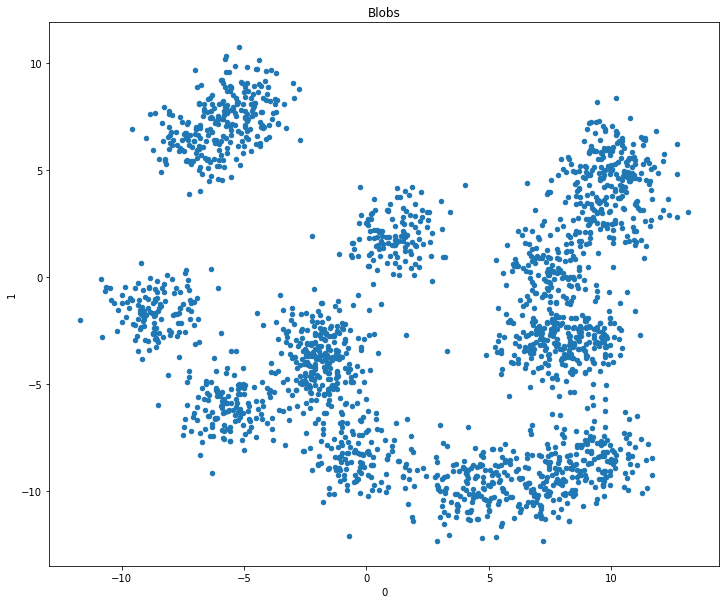

In [23]:
df_blob = pd.DataFrame(make_blobs(random.randint(2000,4000), centers=random.randint(10,30))[0])
df_blob.plot(kind="scatter", x=0, y=1, title="Blobs", figsize=(12,10));

In [24]:
# Scale Data
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_blob)


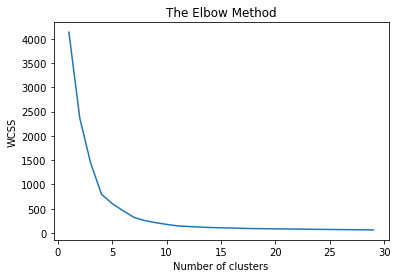

In [29]:
# Create Elbow Plot
# Create Elbow Plot
# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

wcss = [] 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 

# Iterate over different value of K to determine optimal number of clusters
for i in range(1, 30):
    kmeans = KMeans(n_clusters = i,random_state = 42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 30), wcss )
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
# Apply KMeans and Plot KMeans Results
kmeans_blob = KMeans(n_clusters = 7, random_state = 42)

y_kmeans = kmeans_blob.fit_predict(df_scaled)

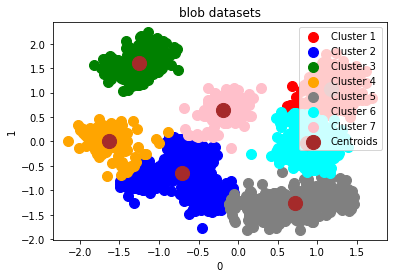

In [35]:
# Plot Clusters
plt.scatter(
    df_scaled[y_kmeans == 0, 0], 
    df_scaled[y_kmeans == 0, 1], 
    s = 100, 
    c = 'red', 
    label = 'Cluster 1'
)

plt.scatter(df_scaled[y_kmeans == 1, 0], df_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(df_scaled[y_kmeans == 2, 0], df_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(df_scaled[y_kmeans == 3, 0], df_scaled[y_kmeans == 3, 1], s = 100, c = 'orange', label = 'Cluster 4')
plt.scatter(df_scaled[y_kmeans == 4, 0], df_scaled[y_kmeans == 4, 1], s = 100, c = 'grey', label = 'Cluster 5')
plt.scatter(df_scaled[y_kmeans == 5, 0], df_scaled[y_kmeans == 5, 1], s = 100, c = 'cyan', label = 'Cluster 6')
plt.scatter(df_scaled[y_kmeans == 6, 0], df_scaled[y_kmeans == 6, 1], s = 100, c = 'pink', label = 'Cluster 7')




# Plot Centroids
plt.scatter(
    kmeans_blob.cluster_centers_[:, 0],
    kmeans_blob.cluster_centers_[:, 1], 
    s = 200, 
    c = 'brown', 
    label = 'Centroids')


# Title and Axes Labels
plt.title('blob datasets')
plt.xlabel('0')
plt.ylabel('1')
plt.legend(loc=1)
plt.show()